<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_UrbanHeat/blob/master/ImgProcessing/20210219_nyp_0124_0125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker # Change xaxis

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load npy

In [37]:
fpaths = pd.read_feather("/content/drive/MyDrive/urban_heat/output/file_paths_times.feather")

In [38]:
fpaths["hour"] = fpaths.times.values.astype(str)
fpaths

,paths,times,fnames_npy,hour
0,01-24/snap-2020-01-24T00-00-07.45.jpeg,2020-01-24 00:00:07.450,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:07.450000000
1,01-24/snap-2020-01-24T00-00-17.50.jpeg,2020-01-24 00:00:17.500,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:17.500000000
2,01-24/snap-2020-01-24T00-00-27.53.jpeg,2020-01-24 00:00:27.530,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:27.530000000
3,01-24/snap-2020-01-24T00-00-37.57.jpeg,2020-01-24 00:00:37.570,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:37.570000000
4,01-24/snap-2020-01-24T00-00-47.61.jpeg,2020-01-24 00:00:47.610,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:47.610000000
...,...,...,...,...
414748,03-15/snap-2020-03-15T23-59-11.49.jpeg,2020-03-15 23:59:11.490,singapore_ir_npy/singapore_ir_414500_415000.npy,2020-03-15T23:59:11.490000000
414749,03-15/snap-2020-03-15T23-59-21.52.jpeg,2020-03-15 23:59:21.520,singapore_ir_npy/singapore_ir_414500_415000.npy,2020-03-15T23:59:21.520000000
414750,03-15/snap-2020-03-15T23-59-31.56.jpeg,2020-03-15 23:59:31.560,singapore_ir_npy/singapore_ir_414500_415000.npy,2020-03-15T23:59:31.560000000
414751,03-15/snap-2020-03-15T23-59-41.61.jpeg,2020-03-15 23:59:41.610,singapore_ir_npy/singapore_ir_414500_415000.npy,2020-03-15T23:59:41.610000000


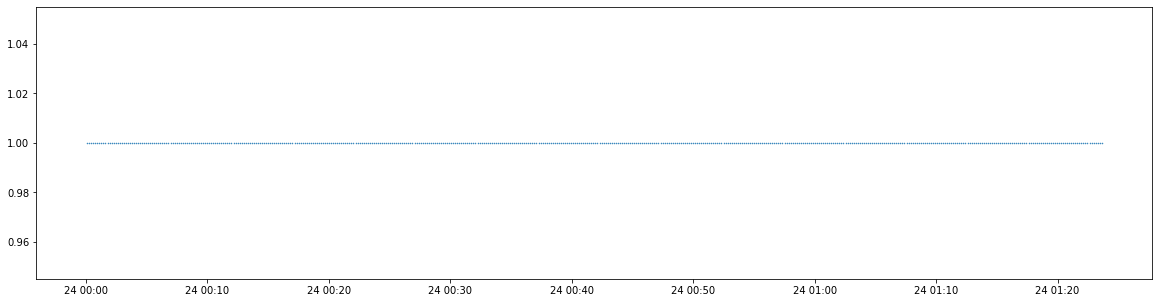

In [39]:
plt.figure(figsize=(20,5))
plt.plot(fpaths.times[:500], np.ones(500), ".", markersize=1)

In [40]:
# -- set start and end time
st = "2020-01-24 19:00:00"
en = "2020-01-25 04:00:00"

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.times >= st) & (fpaths.times < en)]

In [41]:
for i in list(fpaths_sub.index):
  fpaths_sub.hour[i] = fpaths_sub.hour[i].split("T")[1].split(".")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))
fpaths_sub

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,paths,times,fnames_npy,hour,xaxis
6812,01-24/snap-2020-01-24T19-00-01.33.jpeg,2020-01-24 19:00:01.330,singapore_ir_npy/singapore_ir_006500_007000.npy,19:00:01,0
6813,01-24/snap-2020-01-24T19-00-11.37.jpeg,2020-01-24 19:00:11.370,singapore_ir_npy/singapore_ir_006500_007000.npy,19:00:11,1
6814,01-24/snap-2020-01-24T19-00-21.40.jpeg,2020-01-24 19:00:21.400,singapore_ir_npy/singapore_ir_006500_007000.npy,19:00:21,2
6815,01-24/snap-2020-01-24T19-00-31.44.jpeg,2020-01-24 19:00:31.440,singapore_ir_npy/singapore_ir_006500_007000.npy,19:00:31,3
6816,01-24/snap-2020-01-24T19-00-41.49.jpeg,2020-01-24 19:00:41.490,singapore_ir_npy/singapore_ir_006500_007000.npy,19:00:41,4
...,...,...,...,...,...
10034,01-25/snap-2020-01-25T03-59-11.38.jpeg,2020-01-25 03:59:11.380,singapore_ir_npy/singapore_ir_010000_010500.npy,03:59:11,3222
10035,01-25/snap-2020-01-25T03-59-21.42.jpeg,2020-01-25 03:59:21.420,singapore_ir_npy/singapore_ir_010000_010500.npy,03:59:21,3223
10036,01-25/snap-2020-01-25T03-59-31.46.jpeg,2020-01-25 03:59:31.460,singapore_ir_npy/singapore_ir_010000_010500.npy,03:59:31,3224
10037,01-25/snap-2020-01-25T03-59-41.50.jpeg,2020-01-25 03:59:41.500,singapore_ir_npy/singapore_ir_010000_010500.npy,03:59:41,3225


In [42]:
# -- pull out times
times = fpaths_sub.times.values
times

array(['2020-01-24T19:00:01.330000000', '2020-01-24T19:00:11.370000000',
       '2020-01-24T19:00:21.400000000', ...,
       '2020-01-25T03:59:31.460000000', '2020-01-25T03:59:41.500000000',
       '2020-01-25T03:59:51.540000000'], dtype='datetime64[ns]')

In [43]:
hour = fpaths_sub.hour.values
hour

array(['19:00:01', '19:00:11', '19:00:21', ..., '03:59:31', '03:59:41',
       '03:59:51'], dtype=object)

In [44]:
# -- get the numpy file names
fnames_npy = np.unique(fpaths_sub.fnames_npy)
fnames_npy

array(['singapore_ir_npy/singapore_ir_006500_007000.npy',
       'singapore_ir_npy/singapore_ir_007000_007500.npy',
       'singapore_ir_npy/singapore_ir_007500_008000.npy',
       'singapore_ir_npy/singapore_ir_008000_008500.npy',
       'singapore_ir_npy/singapore_ir_008500_009000.npy',
       'singapore_ir_npy/singapore_ir_009000_009500.npy',
       'singapore_ir_npy/singapore_ir_009500_010000.npy',
       'singapore_ir_npy/singapore_ir_010000_010500.npy'], dtype=object)

In [45]:
# -- initialize the imgs list
imgs = []

# -- read in each file
for ii, fname in enumerate(fnames_npy):
  print("reading file {0} ({1} of {2})".format(fname, ii + 1, len(fnames_npy)))

  # -- get indices only for those images we want to keep for this file
  ind = fpaths_sub[fpaths_sub.fnames_npy == fname].index % 500

  # -- append the kept images from this file to the images list
  imgs.append(np.load("/content/drive/MyDrive/urban_heat/data/singapore_ir/" + fname)[ind])

# -- concatentate to an array
imgs = np.concatenate(imgs, axis=0)

reading file singapore_ir_npy/singapore_ir_006500_007000.npy (1 of 8)
reading file singapore_ir_npy/singapore_ir_007000_007500.npy (2 of 8)
reading file singapore_ir_npy/singapore_ir_007500_008000.npy (3 of 8)
reading file singapore_ir_npy/singapore_ir_008000_008500.npy (4 of 8)
reading file singapore_ir_npy/singapore_ir_008500_009000.npy (5 of 8)
reading file singapore_ir_npy/singapore_ir_009000_009500.npy (6 of 8)
reading file singapore_ir_npy/singapore_ir_009500_010000.npy (7 of 8)
reading file singapore_ir_npy/singapore_ir_010000_010500.npy (8 of 8)


In [46]:
imgs.shape

(3227, 240, 320)

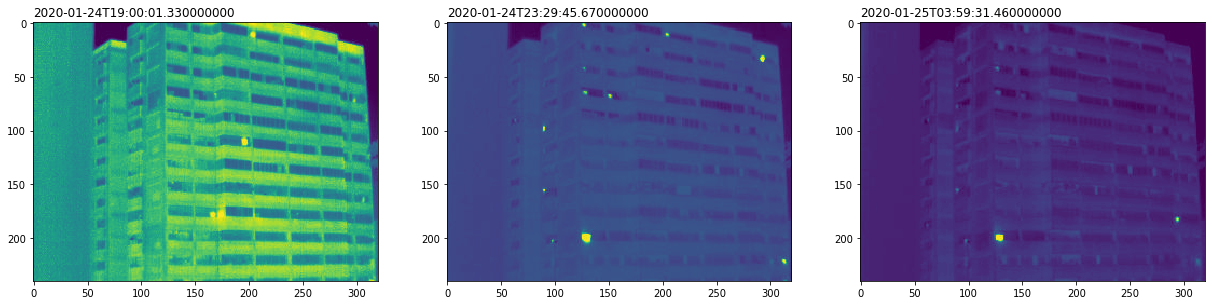

In [47]:
fig, ax = plt.subplots(1,3, figsize=(21,7))
ax[0].imshow(imgs[0], interpolation="nearest")
ax[0].set_title(times[0], loc="left")

ax[1].imshow(imgs[1612], interpolation="nearest")
ax[1].set_title(times[1612], loc="left")

ax[2].imshow(imgs[3224], interpolation="nearest")
ax[2].set_title(times[3224], loc="left")

fig.show()

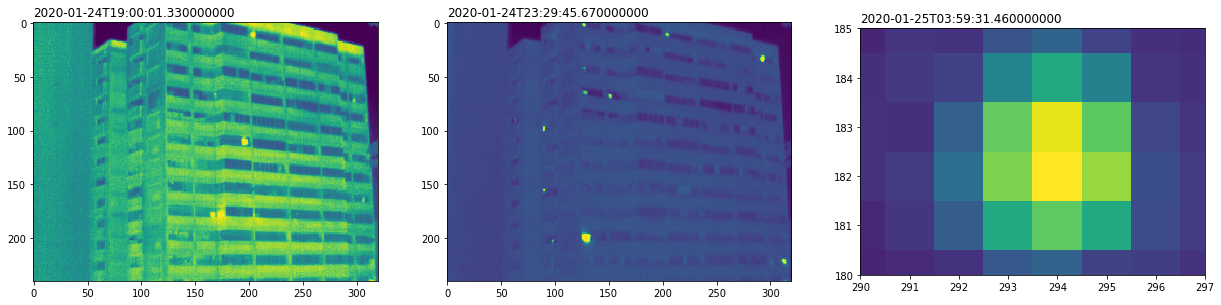

In [48]:
fig, ax = plt.subplots(1,3, figsize=(21,7))
ax[0].imshow(imgs[0], interpolation="nearest")
ax[0].set_title(times[0], loc="left")


ax[1].imshow(imgs[1612], interpolation="nearest")
ax[1].set_title(times[1612], loc="left")

ax[2].imshow(imgs[3224], interpolation="nearest")
ax[2].set_title(times[3224], loc="left")

plt.xlim(290, 297)
plt.ylim(180, 185)
fig.show()

In [49]:
len(imgs[:, 200, 125])

3227

Text(0.5, 1.0, 'Air conditioner unit (7pm-4am, Jan 24-25, 2020)')

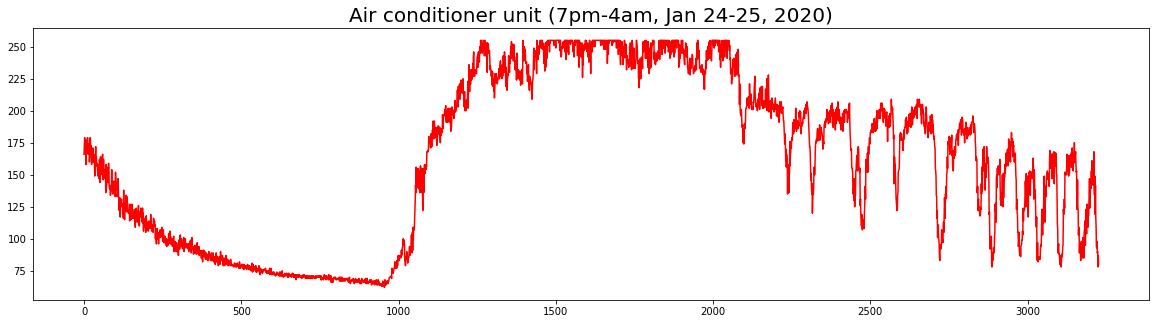

In [50]:
plt.figure(figsize=(20,5))
plt.plot(imgs[:, 200, 125], color="red") # Air conditioner pixel at 7pm-4am
plt.title("Air conditioner unit (7pm-4am, Jan 24-25, 2020)", fontsize=20)

In [51]:
len(fpaths_sub.hour[:]), len(imgs[:, 200, 125])

(3227, 3227)

In [52]:
fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))
fpaths_sub.loc[fpaths_sub["xaxis"] == 1000]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,paths,times,fnames_npy,hour,xaxis
7812,01-24/snap-2020-01-24T21-47-21.18.jpeg,2020-01-24 21:47:21.180,singapore_ir_npy/singapore_ir_007500_008000.npy,21:47:21,1000


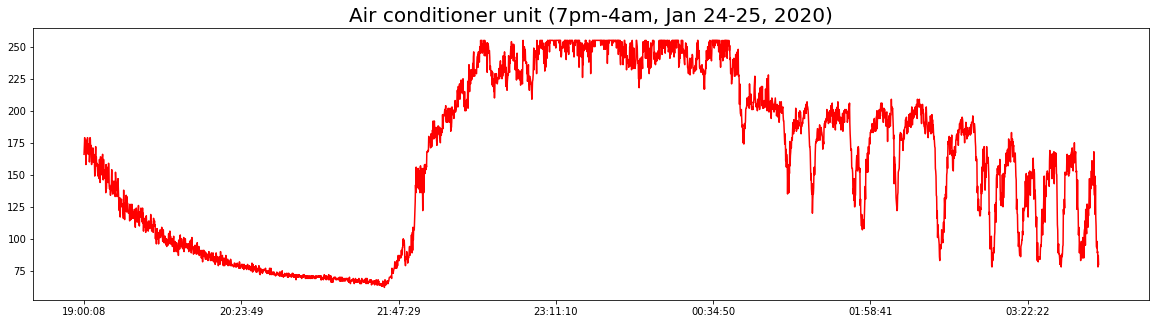

In [53]:
fig, ax = plt.subplots(figsize=(20,5))
#plt.plot(fpaths_sub.hour, imgs[:, 200, 125], color="red")
plt.plot(imgs[:, 200, 125], color="red")
plt.title("Air conditioner unit (7pm-4am, Jan 24-25, 2020)", fontsize=20)
my_xticks=["0", "19:00:08", "20:23:49", "21:47:29", "23:11:10", "00:34:50", "01:58:41", "03:22:22"]
#plt.xticks(fpaths_sub.hour, my_xticks, rotation=45)
ax.set_xticklabels(my_xticks)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'Brightness')

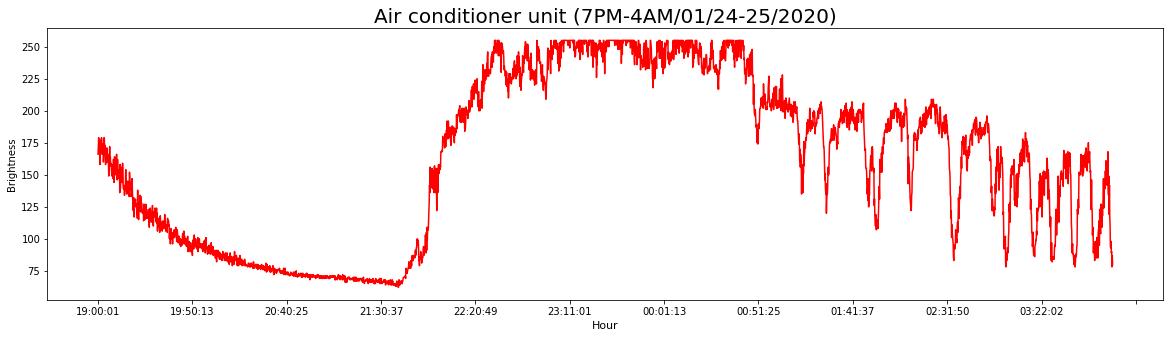

In [54]:
X = fpaths_sub.hour # Needed for xaxis
Y = imgs[:, 200, 125]

plt.figure(figsize=(20,5))
plt.plot(X, Y, color="red")
plt.title("Air conditioner unit (7PM-4AM/01/24-25/2020)", fontsize=20)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=11)
ax.set_ylabel("Brightness")
#ax.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


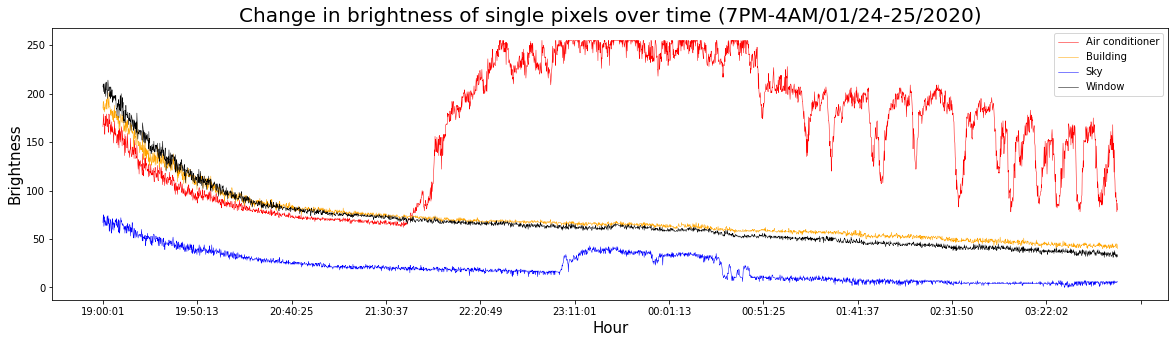

In [55]:
X = fpaths_sub.hour # Needed for xaxis
Y_acs = imgs[:, 200, 125]
Y_bld = imgs[:, 100, 175]
Y_sky = imgs[:, 10, 280]
Y_win = imgs[:, 140, 200]

plt.figure(figsize=(20,5))
plt.plot(X, Y_acs, color="Red", label="Air conditioner", linewidth=0.5)
plt.plot(X, Y_bld, color="Orange", label="Building", linewidth=0.5)
plt.plot(X, Y_sky, color="Blue", label = "Sky", linewidth=0.5)
plt.plot(X, Y_win, color="Black", label = "Window", linewidth=0.5)
plt.title("Change in brightness of single pixels over time (7PM-4AM/01/24-25/2020)", fontsize=20)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Brightness", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


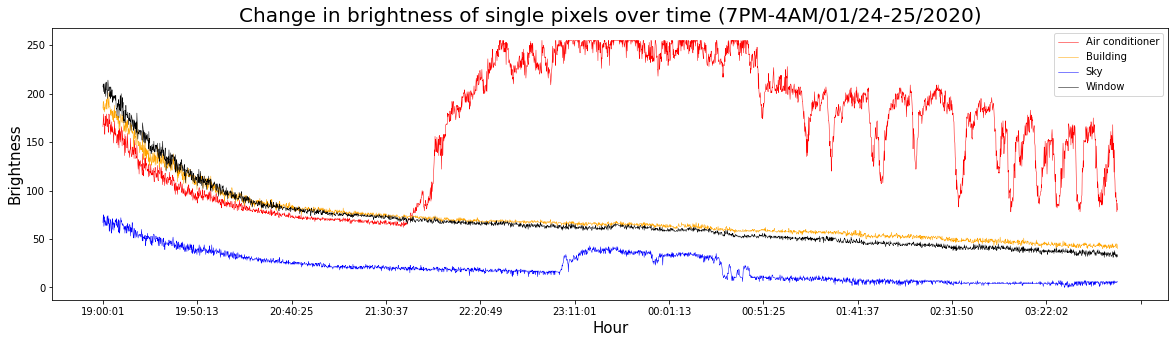

In [56]:
X = fpaths_sub.hour # Needed for xaxis
Y_acs = imgs[:, 200, 125]
Y_bld = imgs[:, 100, 175]
Y_sky = imgs[:, 10, 280]
Y_win = imgs[:, 140, 200]

plt.figure(figsize=(20,5))
plt.plot(X, Y_acs, color="Red", label="Air conditioner", linewidth=0.5)
plt.plot(X, Y_bld, color="Orange", label="Building", linewidth=0.5)
plt.plot(X, Y_sky, color="Blue", label = "Sky", linewidth=0.5)
plt.plot(X, Y_win, color="Black", label = "Window", linewidth=0.5)
plt.title("Change in brightness of single pixels over time (7PM-4AM/01/24-25/2020)", fontsize=20)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Brightness", fontsize=15)
plt.legend(loc="best")

#Make Features

In [57]:
# -- read in the labeled pixels 
acs = np.load("/content/drive/My Drive/urban_heat/output/acs_pix.npy")
bld = np.load("/content/drive/My Drive/urban_heat/output/bld_pix_150.npy")
sky = np.load("/content/drive/My Drive/urban_heat/output/sky_pix_20201112.npy")
win = np.load("/content/drive/My Drive/urban_heat/output/win_pix_150.npy")

# -- convert to pixel numbers
acs_col, acs_row = acs.round().astype(int).T
bld_col, bld_row = bld.round().astype(int).T
sky_col, sky_row = sky.round().astype(int).T
win_col, win_row = win.round().astype(int).T

# -- extract features from images
feat_acs_np = imgs[:, acs_row, acs_col].T
feat_bld_np = imgs[:, bld_row, bld_col].T
feat_sky_np = imgs[:, sky_row, sky_col].T
feat_win_np = imgs[:, win_row, win_col].T

# -- determine the shape of these images so that we know how to set up the convnet
acs_sh = acs.shape
bld_sh = bld.shape
sky_sh = sky.shape
win_sh = win.shape
acs_sh, bld_sh, sky_sh, win_sh

((30, 2), (150, 2), (30, 2), (150, 2))

In [58]:
acs_col

array([ 90,  89, 127, 126, 126, 130, 127,  98, 293, 310, 313, 301, 301,
       142,  90,  97,  63, 291,  62,  89, 208, 206,  89, 126,  89, 127,
       141, 127, 125, 141])

Text(0.0, 1.0, 'Window')

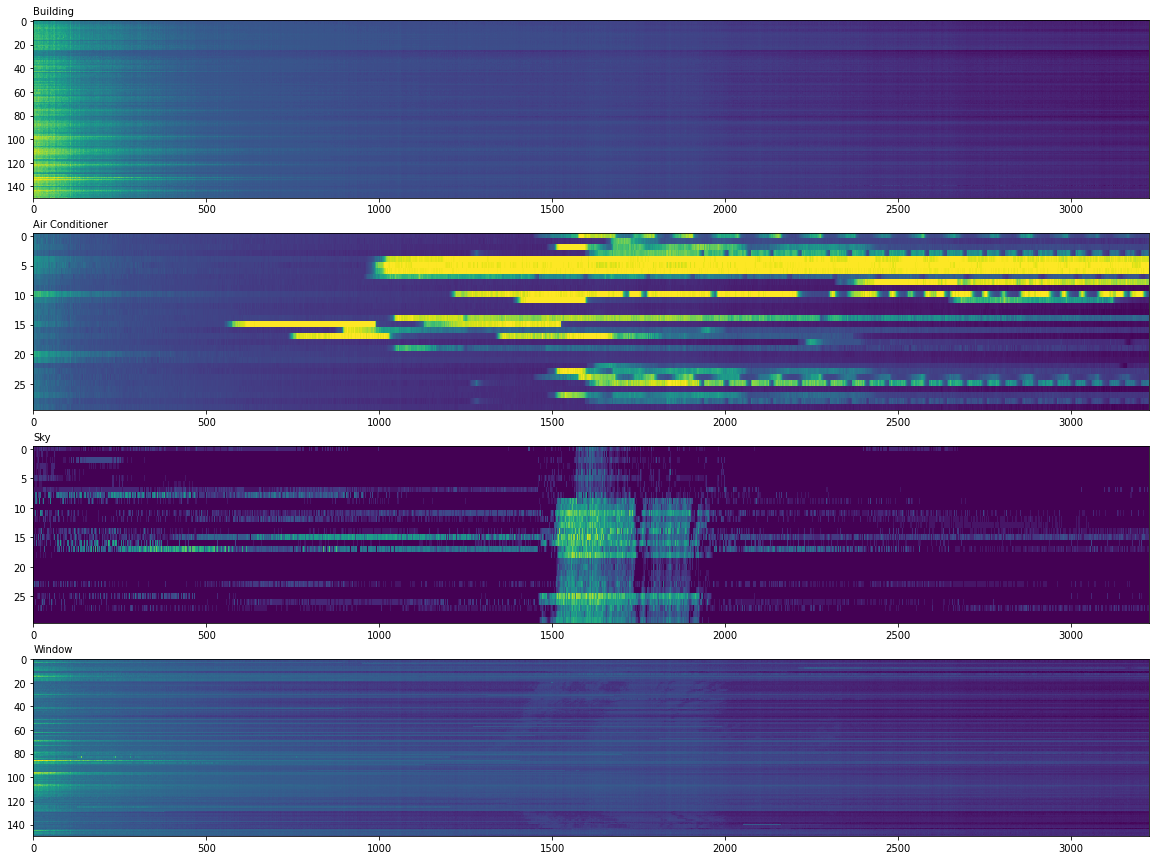

In [59]:
#Figure
fig, ax = plt.subplots(4,1, figsize=(20,15))
ax[0].imshow(feat_bld_np, aspect="auto", interpolation="nearest")
ax[0].set_title("Building", fontsize=10, loc="left")

ax[1].imshow(feat_acs_np, aspect="auto", interpolation="nearest")
ax[1].set_title("Air Conditioner", fontsize=10, loc="left")

ax[2].imshow(feat_sky_np, aspect="auto", interpolation="nearest")
ax[2].set_title("Sky", fontsize=10, loc="left")

ax[3].imshow(feat_win_np, aspect="auto", interpolation="nearest")
ax[3].set_title("Window", fontsize=10, loc="left")

#ax = plt.axes()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
#ax.set_xlabel("Hour", fontsize=15)
#ax.set_ylabel("Number of features", fontsize=15)
#plt.legend(loc="best")

In [60]:
# Make features
# Air conditioner

feat_acs = []

for ii in range(len(acs_row)):
  trow = acs_row[ii]
  tcol = acs_col[ii]
  feat_acs.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_acs = np.array(feat_acs)
print(feat_acs.shape)

# Building
feat_bld = []

for ii in range(len(bld_row)):
  trow = bld_row[ii]
  tcol = bld_col[ii]
  feat_bld.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_bld = np.array(feat_bld)
print(feat_bld.shape)

# Sky
feat_sky = []

for ii in range(len(sky_row)):
  trow = sky_row[ii]
  tcol = sky_col[ii]
  feat_sky.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_sky = np.array(feat_sky)
print(feat_sky.shape)

# Window
feat_win = []

for ii in range(len(win_row)):
  trow = win_row[ii]
  tcol = win_col[ii]
  feat_win.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_win = np.array(feat_win)
print(feat_win.shape)

(30, 11, 11, 3227)
(150, 11, 11, 3227)
(30, 11, 11, 3227)
(150, 11, 11, 3227)


In [61]:
390476/121

3227.0743801652893

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
No handles with labels found to put in legend.


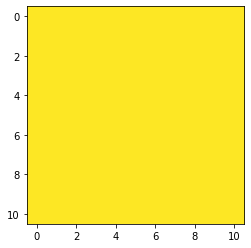

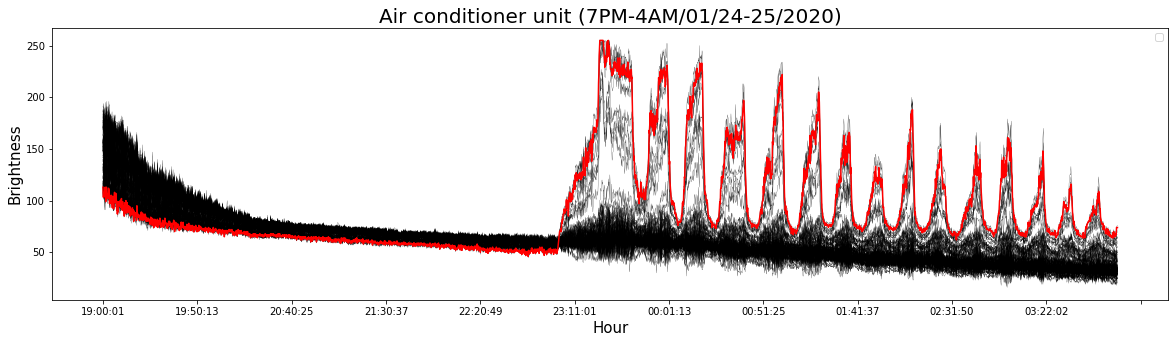

In [62]:
ind = 0 #pick one pixel from features

#Figure1
plt.imshow(feat_acs[ind][:, :, 90], clim=[0, 1])
#Figure2
plt.figure(figsize=(20,5))
dum = plt.plot(fpaths_sub.hour, feat_acs[ind].reshape(121, 3227).T, "k", lw=0.2)
dum = plt.plot(fpaths_sub.hour, feat_acs[ind][5, 5], "r")
plt.title("Air conditioner unit (7PM-4AM/01/24-25/2020)", fontsize=20)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Brightness", fontsize=15)
plt.legend(loc="best")

#Change Point Detection

In [63]:
!pip install ruptures
!pip install changefinder

In [64]:
import ruptures as rpt
import changefinder

In [65]:
feat_acs[0,5,5,:]

array([113, 104, 103, ...,  74,  74,  74], dtype=uint8)

References:

coding: https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/

A review of change point detection: https://www.researchgate.net/publication/322221081_A_review_of_change_point_detection_methods

[Link](https://)


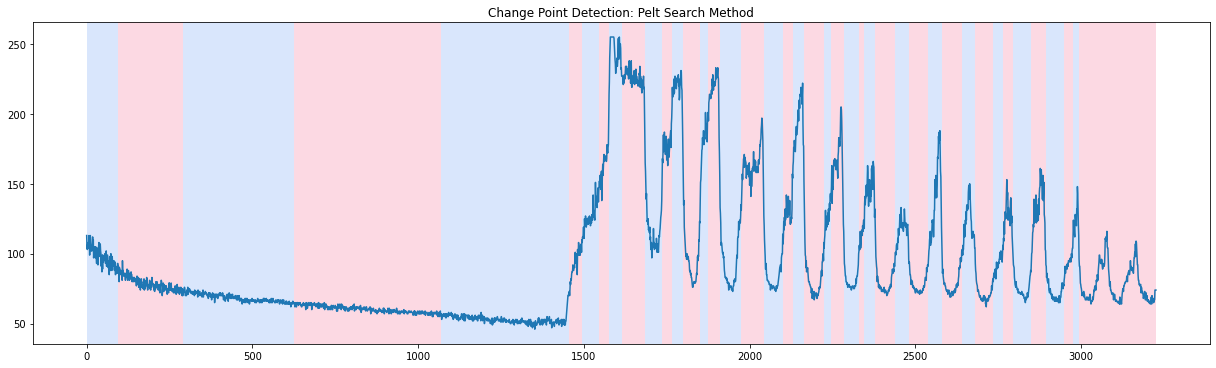

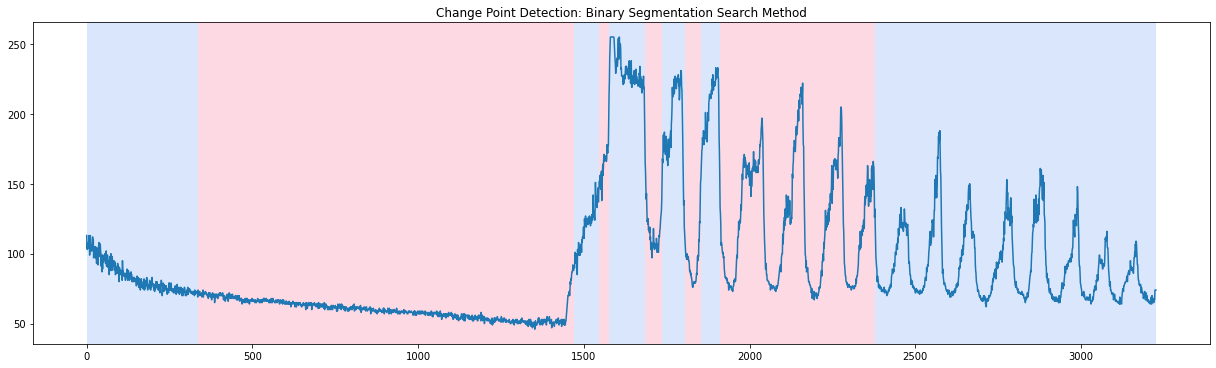

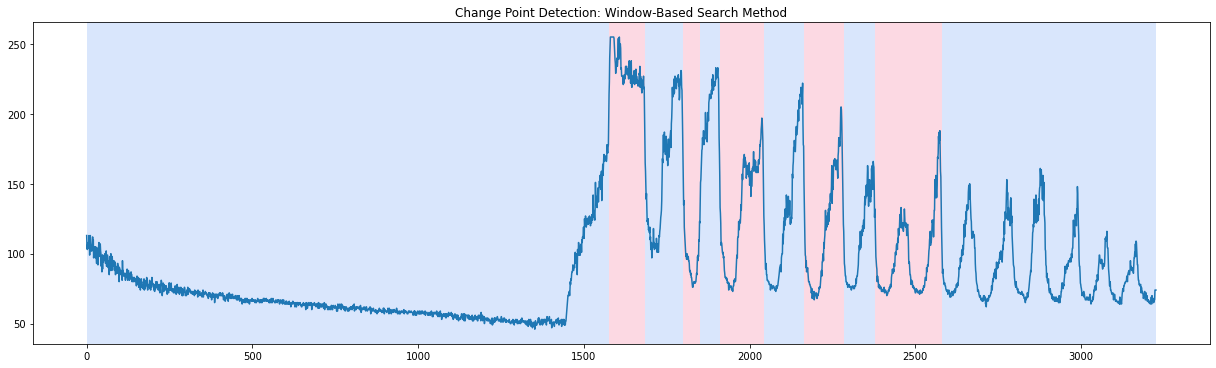

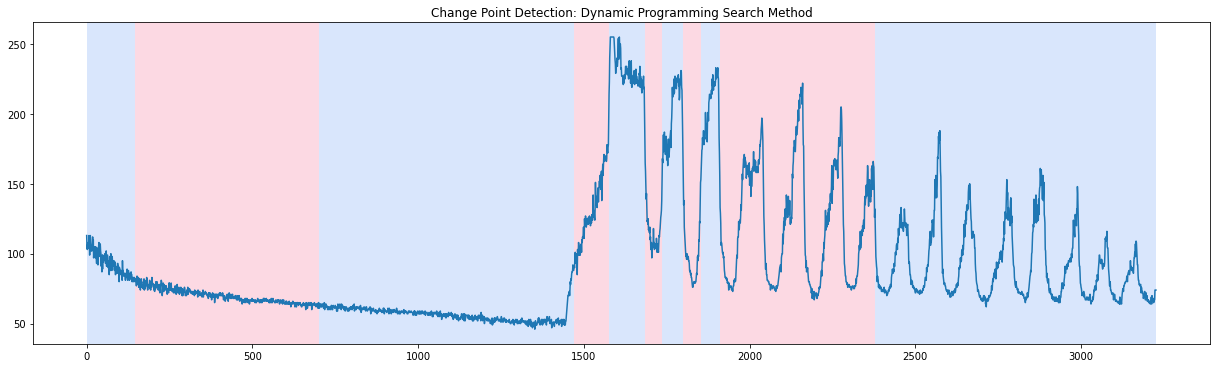

In [66]:
#Convert the time series values to a numpy 1D array
points=np.array(feat_acs[0,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result_pelt = algo.predict(pen=10)
rpt.show.display(points, result_pelt, figsize=(17, 5))
plt.title('Change Point Detection: Pelt Search Method')

#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
result_bin = algo.predict(n_bkps=10)
rpt.show.display(points, result_bin, figsize=(17, 5))
plt.title('Change Point Detection: Binary Segmentation Search Method')

#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
result_win = algo.predict(n_bkps=10)
rpt.show.display(points, result_win, figsize=(17, 5))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()
    
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
result_dyn = algo.predict(n_bkps=10)
rpt.show.display(points, result_dyn, figsize=(17, 5))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

Text(0.5, 1.0, 'Anomaly Score: Air conditioner unit (7PM-4AM/01/24-25/2020)')

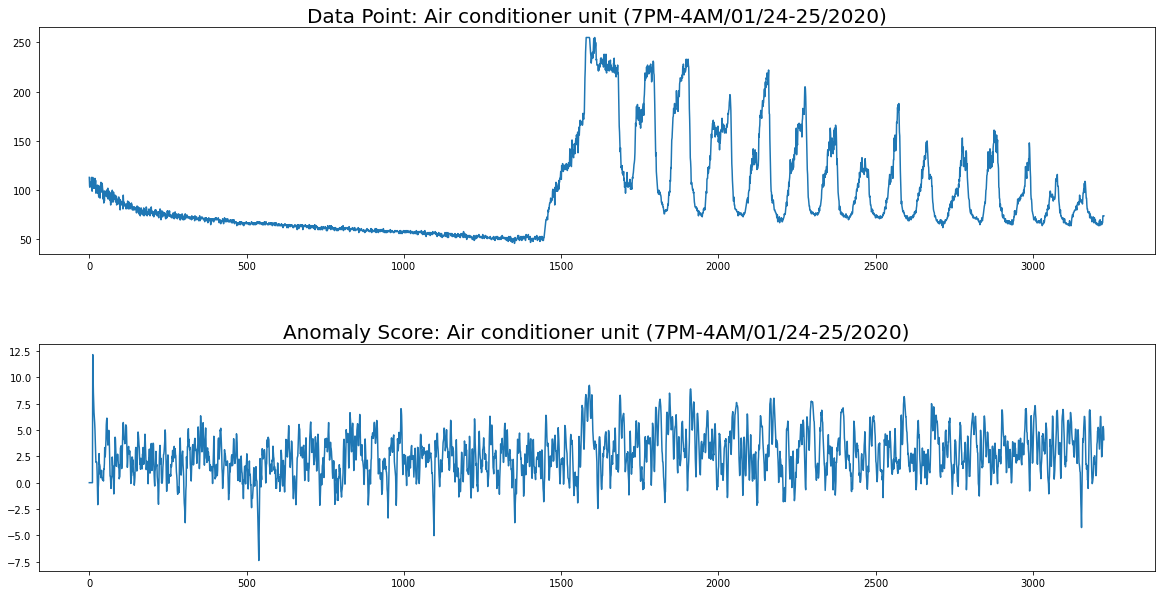

In [67]:
points=np.array(feat_acs[0,5,5,:])

#CHANGEFINDER PACKAGE
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
f.subplots_adjust(hspace=0.4)
ax1.plot(points)
ax1.set_title("Data Point: Air conditioner unit (7PM-4AM/01/24-25/2020)", fontsize=20)

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
ax2.plot(scores)
ax2.set_title("Anomaly Score: Air conditioner unit (7PM-4AM/01/24-25/2020)", fontsize=20)


Text(0.5, 1.0, 'Change Point Detection: Pelt Search Method')

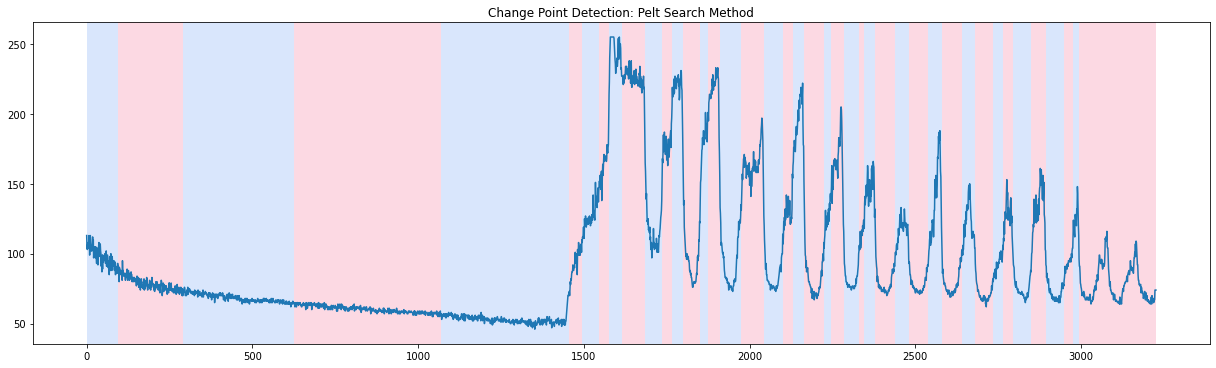

In [68]:
#Convert the time series values to a numpy 1D array
points=np.array(feat_acs[0,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result_pelt = algo.predict(pen=10)
rpt.show.display(points, result_pelt, figsize=(17, 5))
plt.title('Change Point Detection: Pelt Search Method')


In [69]:
algo

In [70]:
len(result_pelt), len(result_bin), len(result_win), len(result_dyn)

(42, 11, 11, 11)